In [1]:
using HDF5

using Plots

include("..\\LiPoSID.jl")

Main.LiPoSID

In [2]:
function read_timeevolution(file_name, state, γ)
    h5open(file_name, "r") do file
        ρᵧ = read(file[state][string(γ)])
        t = ρᵧ["t"]
        ρ₀₀ = ρᵧ["p0"]; Re_ρ₀₁ = ρᵧ["s_re"];  Im_ρ₀₁ = ρᵧ["s_im"]
        ρ_series = []
        t_series = []

        for i in 1:length(t)
            ρᵢ= [ ρ₀₀[i]                      Re_ρ₀₁[i] + im * Im_ρ₀₁[i]
                  Re_ρ₀₁[i] - im * Im_ρ₀₁[i]  1 - ρ₀₀[i]                 ]
            push!(ρ_series, convert(Matrix{ComplexF64}, ρᵢ))
            push!(t_series, convert(Float64, t[i]))
        end
        return(t_series, ρ_series)
    end
end

read_timeevolution (generic function with 1 method)

In [4]:
γ = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

data_file = "../DATA/ALL_GAMMAS_B4_D10.h5"

t, ρ  = read_timeevolution(data_file, "B1", γ[1])
b = LiPoSID.bloch(ρ)

3×1256 Matrix{Float64}:
 0.0       0.0      0.0       0.0      …  1.756e-9  -9.4e-10   -4.396e-9
 0.0       0.0      0.0       0.0         5.274e-9   7.532e-9   5.34e-9
 0.997564  0.99748  0.997623  0.99788     0.998936   0.998946   0.998973

In [30]:
cummean(A) = cumsum(A) ./ (1:length(A))

function plot_bloch_components(γ, n)

    ten_dodeca_states = ["D"*string(i) for i=1:10];
    basis_states = ["B"*string(i) for i=1:4];
    states = [basis_states; ten_dodeca_states]

    data_file = "../DATA/ALL_GAMMAS_B4_D10.h5"

    t, ρ  = read_timeevolution(data_file, states[1], γ)
    b = LiPoSID.bloch(ρ)
    plt = plot(b[n, :], label=false, xlabel="Time steps", ylabel="Bloch component #"*string(n))

    b_ends = []
    push!(b_ends, b[end])

    for state in states[2:end]
        t, ρ  = read_timeevolution(data_file, state, γ)
        b = LiPoSID.bloch(ρ)
        push!(b_ends, b[n, end])
        plt = plot!(b[n, :], label=false)
    end

    b_min = minimum(abs.(b_ends))
    b_max = maximum(abs.(b_ends))

    plt = hline!([b_min, b_max], linestyle=:dash, color=:black, label=false)
    #plt = hline!([b_max], linestyle=:dash, color=:black, label=false)

    plt = annotate!(round(length(ρ)/2), (b_min + b_max)/2, text(string(b_max)*" \n"*string(b_min))) 

    plt = title!("γ ="*string(γ))

    return plt
end

function plot_bloch_cummean(γ, n)

    ten_dodeca_states = ["D"*string(i) for i=1:10];
    basis_states = ["B"*string(i) for i=1:4];
    states = [basis_states; ten_dodeca_states]

    data_file = "../DATA/ALL_GAMMAS_B4_D10.h5"

    t, ρ  = read_timeevolution(data_file, states[1], γ)
    b = LiPoSID.bloch(ρ)
    plt = plot(cummean(b[n, :]), label=false, xlabel="Time steps", ylabel="Bloch component #"*string(n))

    b_ends = []
    push!(b_ends, b[end])

    for state in states[2:end]
        t, ρ  = read_timeevolution(data_file, state, γ)
        b = LiPoSID.bloch(ρ)
        push!(b_ends, b[n, end])
        plt = plot!(cummean(b[n, :]), label=false)
    end

    b_min = minimum(abs.(b_ends))
    b_max = maximum(abs.(b_ends))

    plt = hline!([b_min, b_max], linestyle=:dash, color=:black, label=false)
    #plt = hline!([b_max], linestyle=:dash, color=:black, label=false)

    plt = annotate!(round(length(ρ)/2), (b_min + b_max)/2, text(string(b_max)*" \n"*string(b_min))) 

    plt = title!("γ ="*string(γ))

    return plt
end


function bloch_ends(γ, n)

    ten_dodeca_states = ["D"*string(i) for i=1:10];
    basis_states = ["B"*string(i) for i=1:4];
    states = [basis_states; ten_dodeca_states]

    data_file = "../DATA/ALL_GAMMAS_B4_D10.h5"

    t, ρ  = read_timeevolution(data_file, states[1], γ)
    b = LiPoSID.bloch(ρ)
    plt = plot(b[n, :], label=false, xlabel="Time steps", ylabel="Bloch component #"*string(n))

    b_ends = []
    push!(b_ends, b[n, end])

    for state in states[2:end]
        t, ρ  = read_timeevolution(data_file, state, γ)
        b = LiPoSID.bloch(ρ)
        push!(b_ends, b[end])
        plt = plot!(b[n, :], label=false)
    end

    b_max = maximum(abs.(b_ends))
    b_min = minimum(abs.(b_ends))

    return b_min, b_max
end

bloch_ends (generic function with 1 method)

In [27]:
cummean(A) = cumsum(A) ./ (1:length(A))

cummean([1,2,3])

3-element Vector{Float64}:
 1.0
 1.5
 2.0

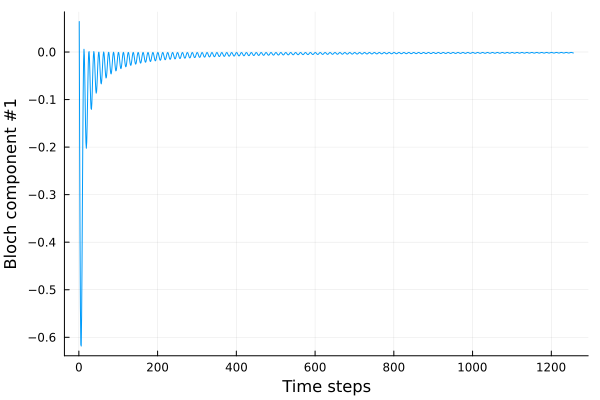

In [28]:
data_file = "../DATA/ALL_GAMMAS_B4_D10.h5"

t, ρ  = read_timeevolution(data_file, "B3", γ[1])
b = LiPoSID.bloch(ρ)
n = 1
plt = plot(cummean(b[n, :]), label=false, xlabel="Time steps", ylabel="Bloch component #"*string(n))

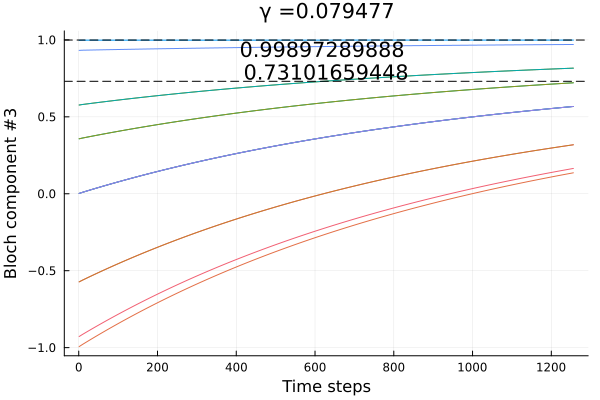

In [36]:
plt = plot_bloch_components(γ[1], 3)
display(plt)

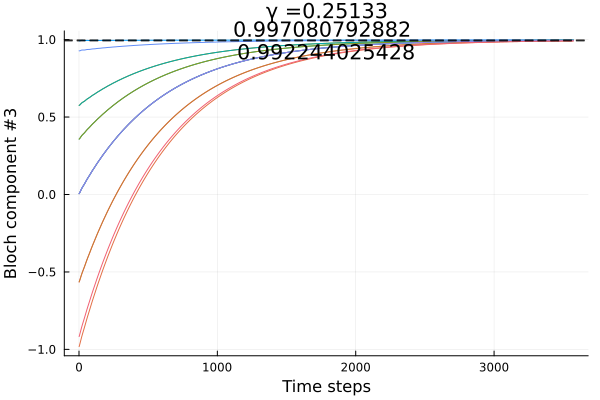

In [236]:
plt = plot_bloch_components(γ[2], 3)
display(plt)

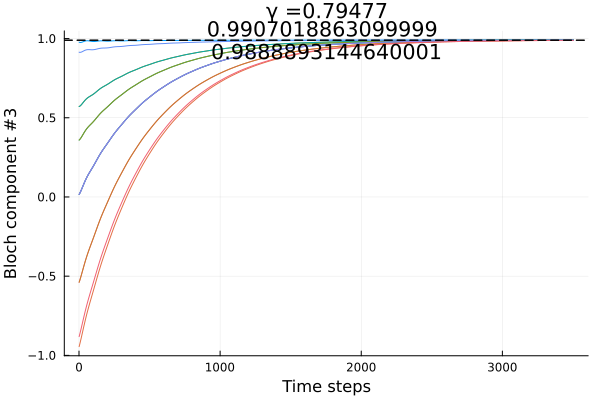

In [232]:
plt = plot_bloch_components(γ[3], 3)
display(plt)

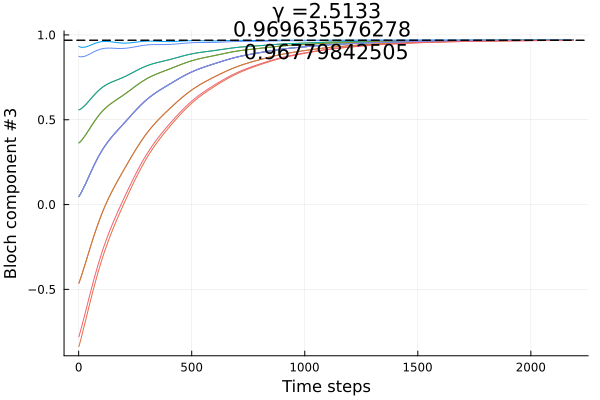

In [240]:
plt = plot_bloch_components(γ[4], 3)
display(plt)

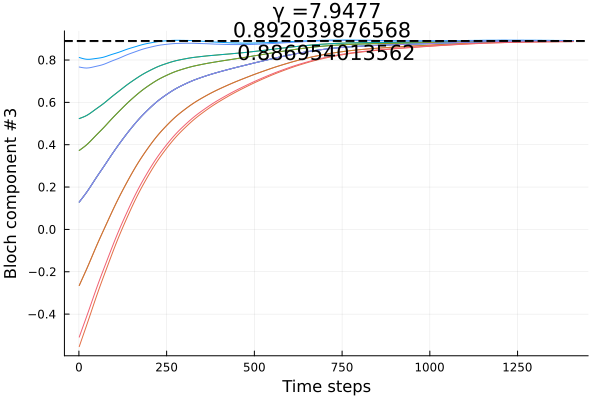

In [241]:
plt = plot_bloch_components(γ[5], 3)
display(plt)

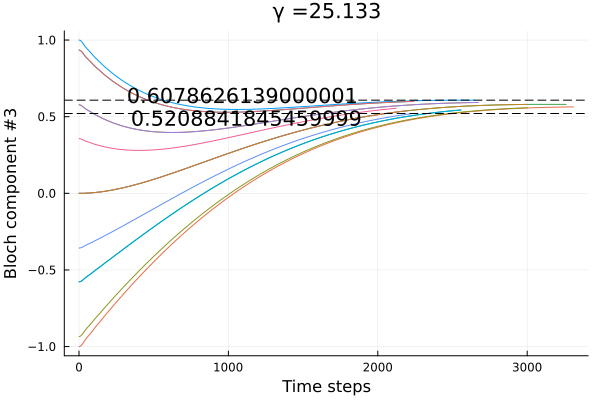

In [245]:
plt = plot_bloch_components(γ[6], 3)
display(plt)


In [217]:
savefig(plt, "gamma_25.png")

"c:\\Users\\Zakhar\\Documents\\GitHub\\OQSID-thesis\\THERMALIZATION\\gamma_25.png"

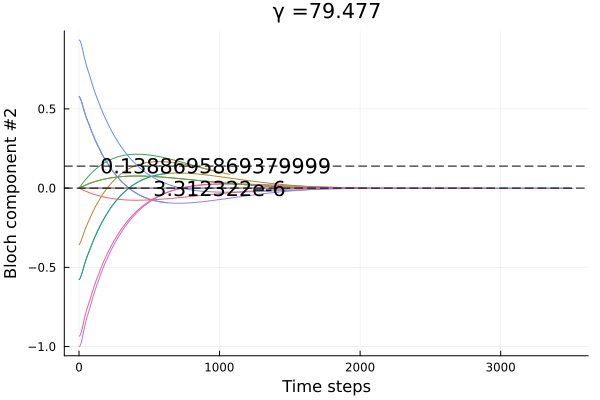

"c:\\Users\\Zakhar\\Documents\\GitHub\\OQSID-thesis\\THERMALIZATION\\gamma_79.png"

In [247]:
plt = plot_bloch_components(γ[7], 2)
display(plt)
savefig(plt, "gamma_79.png")

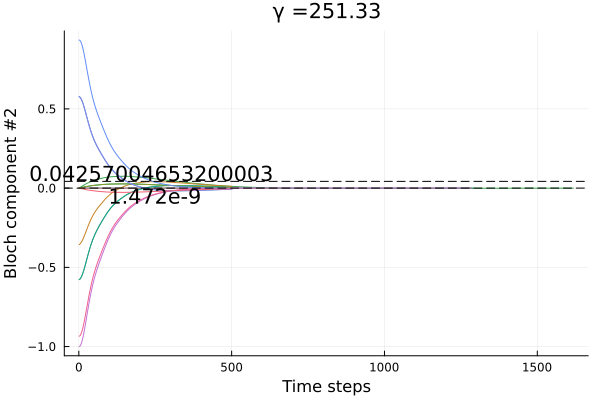

In [220]:
plt = plot_bloch_components(γ[8], 2)
display(plt)

In [221]:
savefig(plt, "gamma_251.png")

"c:\\Users\\Zakhar\\Documents\\GitHub\\OQSID-thesis\\THERMALIZATION\\gamma_251.png"

In [8]:
function plot_bloch_ends(n)

    b_maxs = []
    b_mins = []
    for γᵢ in γ
        b_min, b_max =bloch_ends(γᵢ, n)
        push!(b_maxs, b_max) 
        push!(b_mins, b_min) 
    end

    plt = plot(b_mins, label=false,  ylim=(0,1.1), marker=:+) #seriestype=:scatter,
    plt = plot!(b_maxs, label=false,  ylim=(0,1.1), marker=:+) #seriestype=:scatter,
    plt = title!("Final state of the evolution")
    plt = ylabel!("Bloch component #"*string(n))
    plt = xticks!(1:8, γ)
    plt = ylims!(-1.1, 1.1)

    return plt

end


plot_bloch_ends (generic function with 1 method)

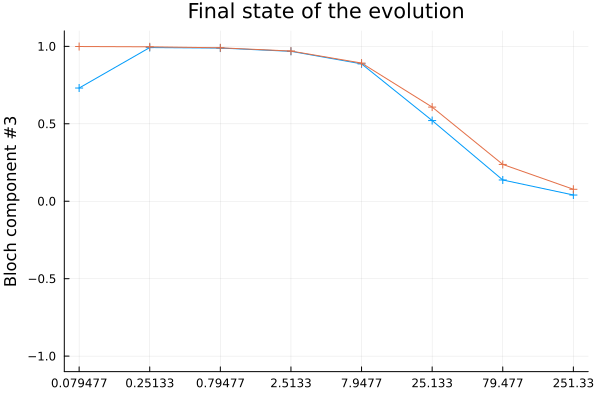

In [229]:
plt = plot_bloch_ends(3)
display(plt)

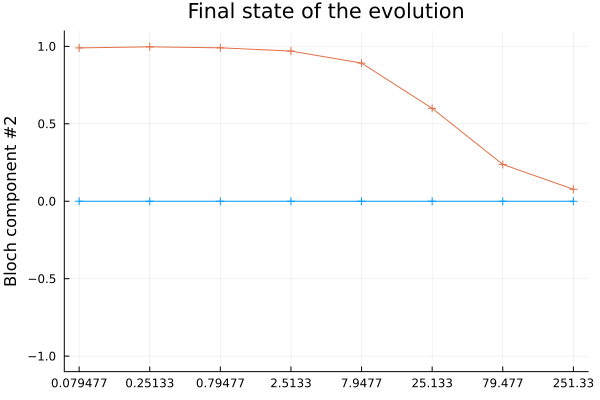

In [9]:
plt = plot_bloch_ends(2)
display(plt)

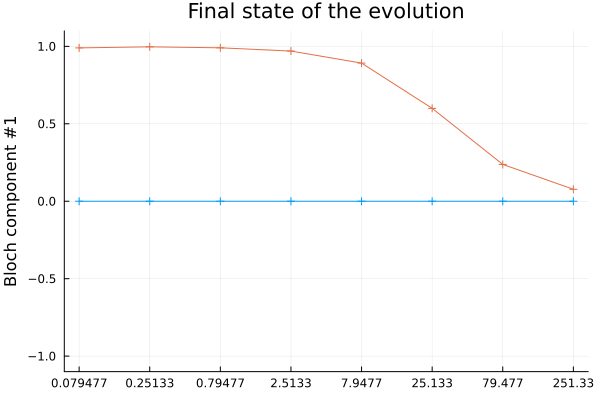

In [10]:
plt = plot_bloch_ends(1)
display(plt)

In [223]:
savefig(plt, "final_state.png")

"c:\\Users\\Zakhar\\Documents\\GitHub\\OQSID-thesis\\THERMALIZATION\\final_state.png"